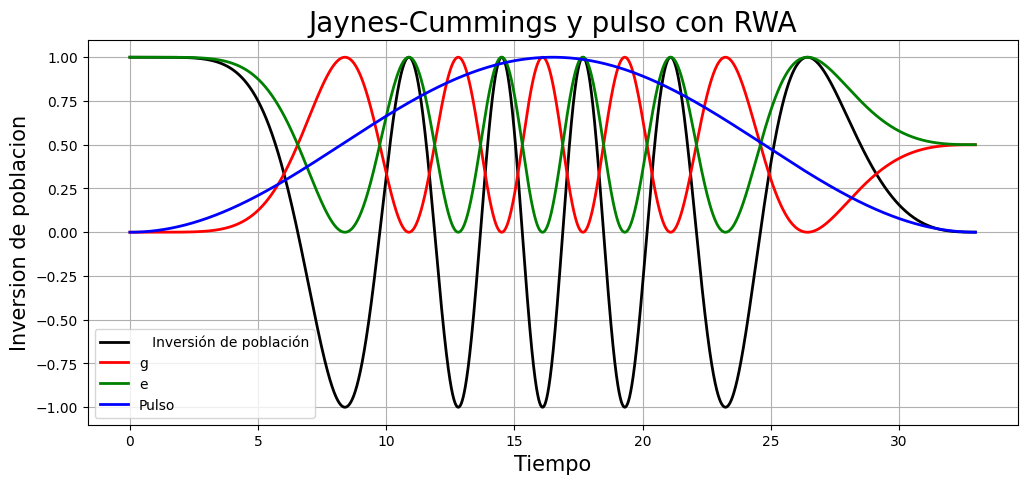

In [1]:
# Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from scipy import *

# Definimos las constantes necesarias
hbar = 1.0
N = 2
N1=50
#N1=3
omega_l = 0.5
omega_r = 0.5
omega_m = 0.5
mu=1
E0=1
g=1
n=10
n2=0
#Estos son los periodos que conozco del problema solamente atómico
#Periodo del pulso para recuperación de poblacion
#T=np.pi*(2*n)/g
#Periodo del pulso para inversión de la población
#T=np.pi*(2*n+1)/(g)
#Periodo del pulso para inversion de poblacion nula
T=np.pi*(2*n+1)/(2*g)
# Definimos la funcion que nos da el pulso
#T=np.pi*(2*n+1)/(2*g*np.sqrt(n2+1))


def pulso(t, args):
    return (np.sin(np.pi*t/T)**2) * np.cos(omega_l * (t-T/2))

def pulso_l(t, args):
    return g*np.sin(np.pi*t/T)**2

def pulso2(t):
    return (np.sin(np.pi*t/T)**2) * np.cos(omega_l * (t-T/2))

def pulso_l2(t,g):
    return g*np.sin(np.pi*t/T)**2

#Definamos un pulso lineal
def pulso_lineal(t, args):
    return g*t/T

def pulso_lineal_2(t):
    return g*t/T

#Escribamos la función analitica para la inversion de poblacion
def inversion0(t,g,n):
    return np.cos(2*g*t*np.sqrt(n2+1))

# Definir la función Heaviside
def heaviside(t,args):
    return g
def heaviside2(t,g):
    return g

psi01 = tensor(basis(N1, 0), basis(2, 1))  # start with an ground state for the atoms and zero photons
psi00 = tensor(basis(N1, 1), basis(2, 0))  # start with an ground state for the atoms and one photon

# operators
a = tensor(destroy(N1), qeye(2))
sm = tensor(qeye(N1), destroy(2))
#Definamos sigma x y sigma y#plt.plot(t,-(result.expect[2]-result.expect[3]),label="Sigma y - Sigma x")


# Hamiltonian

H_0 = omega_r * a.dag() * a + 0.5*omega_m * (sm.dag() * sm-sm *sm.dag()) + g * (a.dag() + a) * (sm + sm.dag())
H_01 = omega_r * a.dag() * a + 0.5*omega_m * (sm.dag() * sm-sm *sm.dag()) + g * (a.dag()*sm + a*sm.dag()) 
H02 =  0.5*omega_m * (sm.dag() * sm-sm *sm.dag())
H03 = omega_r * a.dag() * a + 0.5*omega_m * (sm.dag() * sm-sm *sm.dag())
H04 = omega_m * (sm.dag() * sm-sm *sm.dag())

# Definimos el tiempo discreto
num_steps = 10000

t = np.linspace(0, T, num_steps)
t2 = np.linspace(0, T, num_steps)

HI1 = (sm + sm.dag())*mu
HI2 = (a + a.dag())*0.5
HI3 = ((sm + sm.dag()) + (a + a.dag())*0.5)
HI4 = g * (a.dag()*sm + a*sm.dag())


# Definimos el Hamiltoniano total
H= [H_01, [HI1, pulso]]
H1= [H_01, [HI1, pulso]]
H2 = [H03, [HI4, pulso]]
H3 = [H03, [HI4, pulso_l]]
H32 = [H03, [HI4, heaviside]]


# Resolvemos la ecuacion diferencial
result = mesolve(H3, psi01, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])
result3 = mesolve(H32, psi01, t2, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])
result2 = mesolve(H1, psi01, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])

# Graficamos la inversion de poblacion
plt.figure(figsize=(12,5))
#plt.title("Átomo y pulso tipo seno cuadrado",fontsize=20)
#plt.plot(t, result.expect[1], label="Inversion de poblacion",color='red',lw=2)
plt.plot(t, result.expect[1], label="   Inversión de población",color='black',lw=2)
plt.plot(t, result.expect[2], label="g",color='red',lw=2)
plt.plot(t, result.expect[3], label="e",color='green',lw=2)
#plt.plot(t, result.expect[0], label="Fotones",color='yellow',lw=2)
#plt.plot(t,pulso2(t),label="Pulso",color='red',lw=2)
plt.plot(t,pulso_l2(t,g),label="Pulso",color='blue',lw=2)
#plt.plot(t, inversion0(t,g,n2), label="Inversion de poblacion analitica",color='black',lw=2)
plt.grid()
#Hagamos una linea vertical en pi
#plt.axvline(x=np.pi,color='red',lw=2)
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel('Inversion de poblacion',fontsize=15)
plt.title("Jaynes-Cummings y pulso con RWA",fontsize=20)
plt.legend()
plt.show()


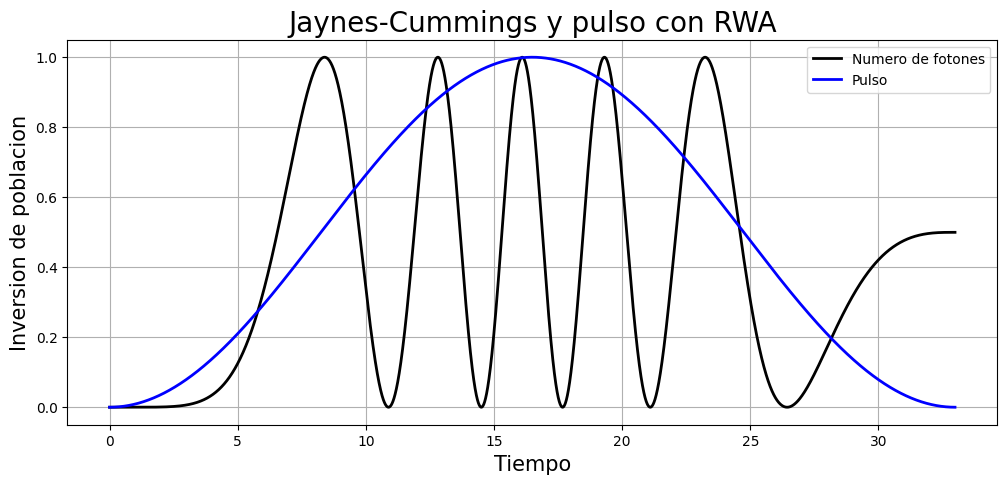

In [2]:
# Graficamos el número promedio de fotones
plt.figure(figsize=(12,5))
plt.title("Átomo y pulso tipo seno cuadrado",fontsize=20)
#plt.plot(t, result.expect[1], label="Inversion de poblacion",color='red',lw=2)
plt.plot(t, result.expect[0], label="Numero de fotones",color='black',lw=2)
#plt.plot(t,pulso2(t),label="Pulso",color='red',lw=2)
plt.plot(t,pulso_l2(t,g),label="Pulso",color='blue',lw=2)
#plt.plot(t, inversion0(t,g,n2), label="Inversion de poblacion analitica",color='black',lw=2)
plt.grid()
#Hagamos una linea vertical en pi
#plt.axvline(x=np.pi,color='red',lw=2)
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel('Inversion de poblacion',fontsize=15)
plt.title("Jaynes-Cummings y pulso con RWA",fontsize=20)
plt.legend()
plt.show()

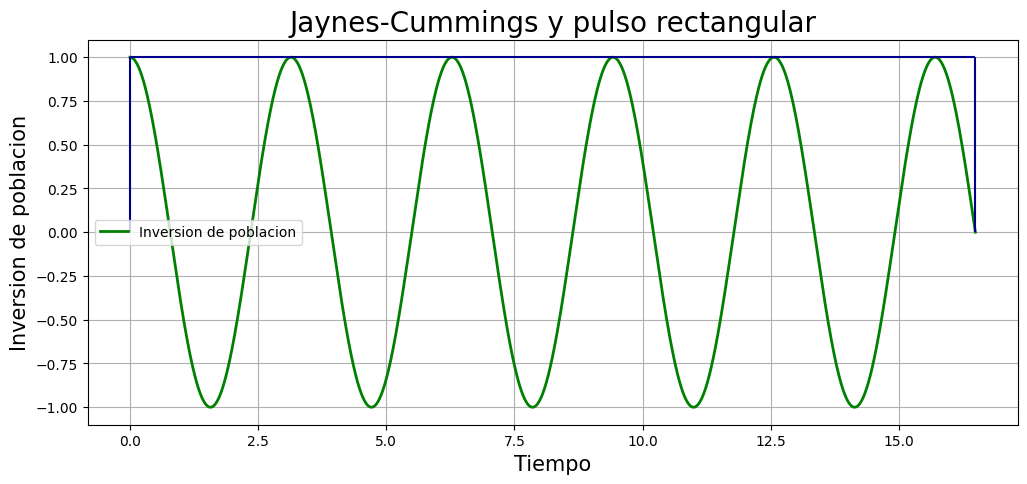

In [3]:


#Periodos para la función Heaviside
#Periodo del pulso para inversion de poblacion
#T=np.pi*(2*n+1)/(2*g)
#Periodo del pulso para recuperación de la población
#T=np.pi*n/(g)
#Periodo del pulso para inversion de poblacion nula
T=np.pi*(2*n+1)/(4*g)
def pulso(t, args):
    return (np.sin(np.pi*t/T)**2) * np.cos(omega_l * (t-T/2))

def pulso_l(t, args):
    return np.sin(np.pi*t/T)**2

def pulso2(t):
    return (np.sin(np.pi*t/T)**2) * np.cos(omega_l * (t-T/2))

def pulso_l2(t,g):
    return g*np.sin(np.pi*t/T)**2

#Definamos un pulso lineal
def pulso_lineal(t, args):
    return g*t/T

def pulso_lineal_2(t):
    return g*t/T

#Escribamos la función analitica para la inversion de poblacion
def inversion0(t,g,n2):
    return np.cos(2*g*t*np.sqrt(n2+1))

# Definir la función Heaviside
def heaviside(t,args):
    return g
def heaviside2(t,g):
    return g

psi01 = tensor(basis(N1, 0), basis(2, 1))  # start with an ground state for the atoms and zero photons
psi00 = tensor(basis(N1, 1), basis(2, 0))  # start with an ground state for the atoms and one photon

# operators
a = tensor(destroy(N1), qeye(2))
sm = tensor(qeye(N1), destroy(2))
#Definamos sigma x y sigma y#plt.plot(t,-(result.expect[2]-result.expect[3]),label="Sigma y - Sigma x")


# Hamiltonian

H_0 = omega_r * a.dag() * a + 0.5*omega_m * (sm.dag() * sm-sm *sm.dag()) + g * (a.dag() + a) * (sm + sm.dag())
H_01 = omega_r * a.dag() * a + 0.5*omega_m * (sm.dag() * sm-sm *sm.dag()) + g * (a.dag()*sm + a*sm.dag()) 
H02 =  0.5*omega_m * (sm.dag() * sm-sm *sm.dag())
H03 = omega_r * a.dag() * a + 0.5*omega_m * (sm.dag() * sm-sm *sm.dag())

# Definimos el tiempo discreto
num_steps = 1000

t = np.linspace(0, T, num_steps)
t2 = np.linspace(0, T, num_steps)

HI1 = (sm + sm.dag())*mu
HI2 = (a + a.dag())*0.5
HI3 = ((sm + sm.dag()) + (a + a.dag())*0.5)
HI4 = g * (a.dag()*sm + a*sm.dag())


# Definimos el Hamiltoniano total
H= [H_01, [HI1, pulso]]
H1= [H_01, [HI1, pulso]]
H2 = [H03, [HI4, pulso]]
H3 = [H03, [HI4, pulso_l]]
H32 = [H03, [HI4, heaviside]]

# Resolvemos la ecuacion diferencial
result = mesolve(H3, psi01, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])
result3 = mesolve(H32, psi01, t2, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])
result2 = mesolve(H1, psi01, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])
# Graficamos la inversion de poblacion
plt.figure(figsize=(12,5))
plt.title("Átomo y pulso con RWA",fontsize=20)
plt.plot(t2, result3.expect[1], label="Inversion de poblacion",color='green',lw=2)
#Pintemos una linea horizontal de valor g entre cero y T sin heaviside
plt.hlines(g, 0, T, color = 'darkblue')
plt.vlines(0, 0, g, color = 'darkblue')
plt.vlines(T, 0, g, color = 'darkblue')
#plt.plot(t,pulso2(t),label="Pulso",color='red',lw=2)
#plt.plot(t2,heaviside2(t2,g),label="Pulso",color='blue',lw=2)
#plt.plot(t, inversion0(t,g,n2), label="Inversion de poblacion analitica",color='black',lw=2)
#plt.plot(t, inversion0(t,g,n2), label="Inversion de poblacion analitica",color='black',lw=2)
plt.grid()
plt.xlabel('Tiempo',fontsize=15)
plt.ylabel('Inversion de poblacion',fontsize=15)
np.sign(t)
plt.title("Jaynes-Cummings y pulso rectangular",fontsize=20)
plt.legend()
plt.show()

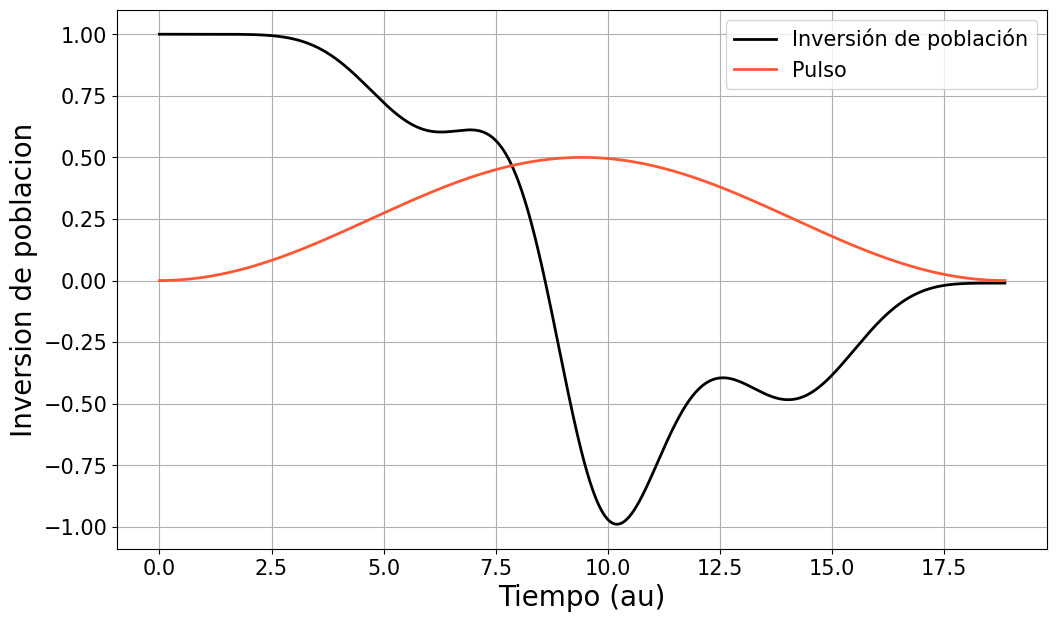

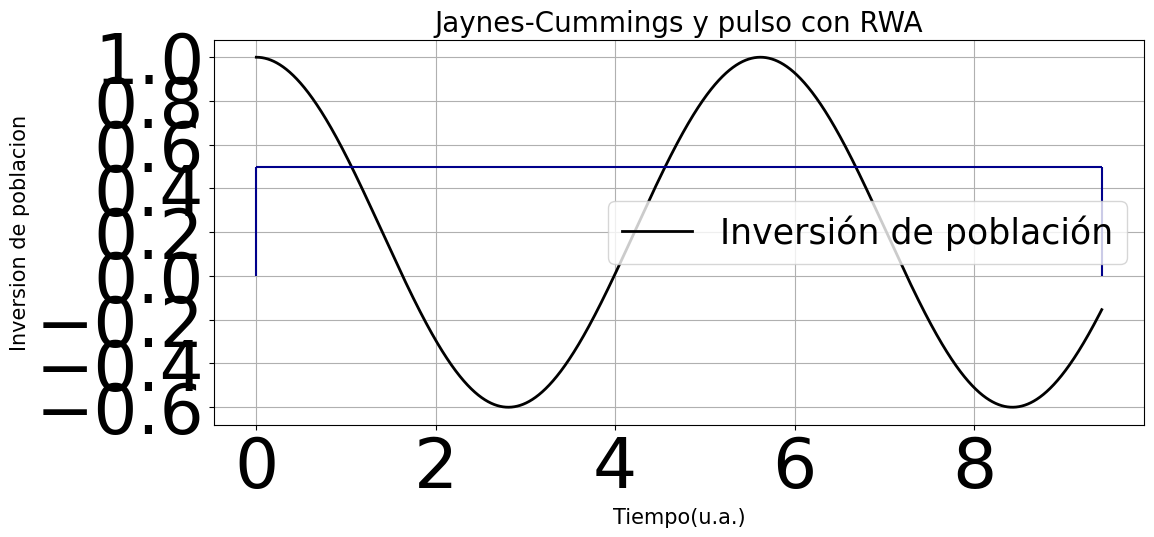

In [8]:
#Ahora veamos los resultados del teorema de área para el caso de un pulso rectangular con interacción atomo-campo

#Definamos los periodos para el pulso tipo seno cuadrado
n=1 
mu=0.5
E0=1
d=mu*E0
#Periodo del pulso para recuperación de poblacion
#T=2*np.pi*(2*n)/d
#Periodo del pulso para inversión de la población
#T=2*np.pi*(2*n+1)/(d)
#Periodo del pulso para inversion de poblacion nula
T=np.pi*(2*n+1)/(d)

#Ahora definamos las duraciones de la envolvente tipo seno cuadrado
#Periodo del pulso para recuperación de poblacion
#T1=4*np.pi*(2*n)/d
#Periodo del pulso para inversión de la población
#T1=np.pi*(2*n+1)/(d)
#Periodo del pulso para inversion de poblacion nula
T1=np.pi*(2*n+1)/(2*d)

def pulso(t, args):
    return d*(np.sin(np.pi*t/T)**2) * np.cos(omega_l * (t-T/2))

def pulso_l(t, args):
    return d*np.sin(np.pi*t/T)**2

def pulso2(t):
    return d*(np.sin(np.pi*t/T)**2) * np.cos(omega_l * (t-T/2))

def pulso_l2(t,g):
    return d*np.sin(np.pi*t/T)**2

#Definamos un pulso lineal
def pulso_const(t2, args):
    return d

def pulso_const2(t2,d):
    return d




psi01 = tensor(basis(N1, 0), basis(2, 1))  # start with an ground state for the atoms and zero photons
psi00 = tensor(basis(N1, 1), basis(2, 0))  # start with an ground state for the atoms and one photon

# operators
a = tensor(destroy(N1), qeye(2))
sm = tensor(qeye(N1), destroy(2))
#Definamos sigma x y sigma y#plt.plot(t,-(result.expect[2]-result.expect[3]),label="Sigma y - Sigma x")


# Hamiltonian


H0 = omega_m * (sm.dag() * sm-sm *sm.dag())*0.5

# Definimos el tiempo discreto
num_steps = 10000

t = np.linspace(0, T, num_steps)
t2 = np.linspace(0, T1, num_steps)

HI1 = (sm + sm.dag())


# Definimos el Hamiltoniano total
H= [H0, [HI1, pulso]]
H1= [H0, [HI1, pulso_const]]



# Resolvemos la ecuacion diferencial
result = mesolve(H, psi01, t, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])
result2 = mesolve(H1, psi01, t2, [], [a.dag() * a, (sm.dag() * sm-sm *sm.dag()),sm *sm.dag(),sm.dag() * sm])


# Graficamos la inversion de poblacion
plt.figure(figsize=(12,7))
#plt.title("Átomo y pulso tipo seno cuadrado",fontsize=20)
plt.plot(t, result.expect[1], label="Inversión de población",color='black',lw=2)
plt.plot(t,pulso_l2(t,g),label="Pulso",color='#FF5733',lw=2)
plt.grid()
plt.xlabel('Tiempo (u.a.)',fontsize=20)
plt.ylabel('Inversion de poblacion',fontsize=20)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title("Jaynes-Cummings y pulso con RWA",fontsize=20)
#plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.title("Átomo y envolvente constante",fontsize=20)
plt.plot(t2, result2.expect[1], label="Inversión de población",color='black',lw=2)
plt.hlines(d, 0, T1, color = 'darkblue')
plt.vlines(0, 0, d, color = 'darkblue')
plt.vlines(T1, 0, d, color = 'darkblue')
plt.grid()
plt.xlabel('Tiempo(u.a.)',fontsize=15)
plt.ylabel('Inversion de poblacion',fontsize=15)
#Cambiar el tamaño del tick
plt.xticks(fontsize=50)
plt.yticks(fontsize=50)
plt.title("Jaynes-Cummings y pulso con RWA",fontsize=20)
plt.legend(fontsize=25)
plt.show()

